In [9]:
import sys
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

In [10]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.preprocessing.preprocessing import load_and_split_data, load_and_split_data_for_vgg16, TARGET_CLASSES
from src.evaluation.evaluate import evaluate_model, evaluate_model_pro

In [3]:
_, _, test_ds, _ = load_and_split_data(batch_size=32) # for evaluation we only use test ds

                     precision    recall  f1-score   support

     baby_back_ribs       0.89      0.88      0.89       118
  breakfast_burrito       0.85      0.95      0.90       111
          hamburger       0.95      0.86      0.91       122
           pancakes       0.93      0.92      0.93       103
              pizza       0.95      0.92      0.94       106
            risotto       0.92      0.91      0.92       101
              steak       0.81      0.85      0.83       112
spaghetti_bolognese       0.96      0.95      0.96       108

           accuracy                           0.91       881
          macro avg       0.91      0.91      0.91       881
       weighted avg       0.91      0.91      0.91       881



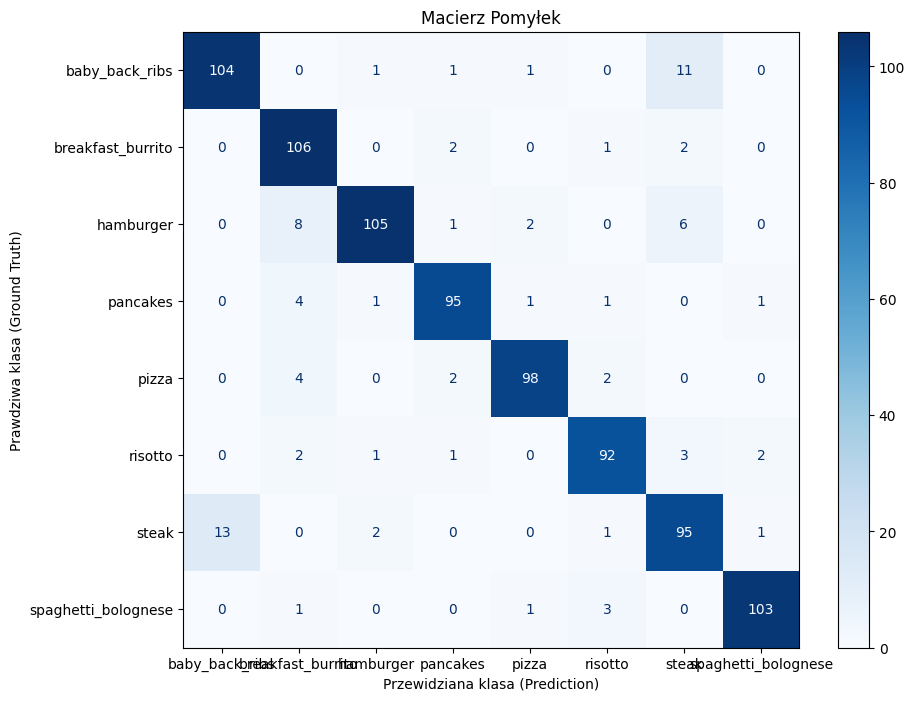

array([[104,   0,   1,   1,   1,   0,  11,   0],
       [  0, 106,   0,   2,   0,   1,   2,   0],
       [  0,   8, 105,   1,   2,   0,   6,   0],
       [  0,   4,   1,  95,   1,   1,   0,   1],
       [  0,   4,   0,   2,  98,   2,   0,   0],
       [  0,   2,   1,   1,   0,  92,   3,   2],
       [ 13,   0,   2,   0,   0,   1,  95,   1],
       [  0,   1,   0,   0,   1,   3,   0, 103]], dtype=int64)

In [4]:
model_path = 'models/final_efficientnet_8class.h5'
model = load_model(model_path)
evaluate_model(model, test_ds, TARGET_CLASSES)

# VGG16

In [11]:
_, _, test_ds, _ = load_and_split_data_for_vgg16(batch_size=32)

                     precision    recall  f1-score   support

     baby_back_ribs       0.86      0.86      0.86       118
  breakfast_burrito       0.84      0.94      0.89       111
          hamburger       0.95      0.84      0.89       122
           pancakes       0.92      0.87      0.90       103
              pizza       0.94      0.87      0.90       106
            risotto       0.91      0.88      0.89       101
              steak       0.71      0.83      0.77       112
spaghetti_bolognese       0.95      0.94      0.95       108

           accuracy                           0.88       881
          macro avg       0.89      0.88      0.88       881
       weighted avg       0.89      0.88      0.88       881



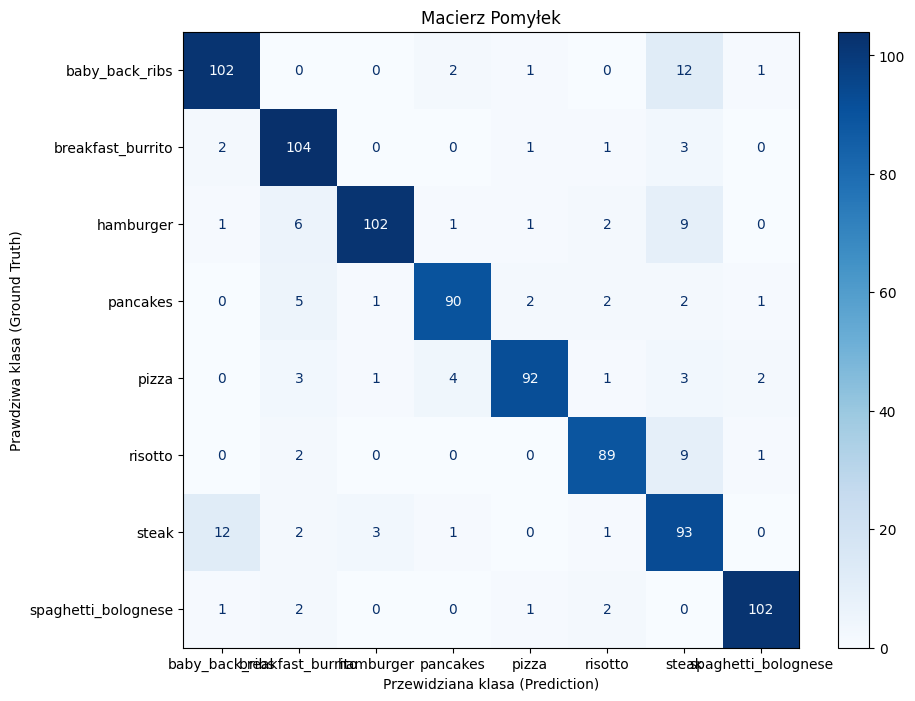

array([[102,   0,   0,   2,   1,   0,  12,   1],
       [  2, 104,   0,   0,   1,   1,   3,   0],
       [  1,   6, 102,   1,   1,   2,   9,   0],
       [  0,   5,   1,  90,   2,   2,   2,   1],
       [  0,   3,   1,   4,  92,   1,   3,   2],
       [  0,   2,   0,   0,   0,  89,   9,   1],
       [ 12,   2,   3,   1,   0,   1,  93,   0],
       [  1,   2,   0,   0,   1,   2,   0, 102]])

In [12]:
#Model po odmrożeniu warstw
model_path = 'models/final_vgg16_8class_compressed.h5'
model = load_model(model_path)
evaluate_model(model, test_ds, TARGET_CLASSES)

--- Rozpoczynam ewaluację: Model ---

Szczegółowy Raport Klasyfikacji:


,precision,recall,f1-score,support
baby_back_ribs,36.17%,28.81%,32.08%,118
breakfast_burrito,22.30%,54.05%,31.58%,111
hamburger,61.54%,6.56%,11.85%,122
pancakes,22.48%,65.05%,33.42%,103
pizza,35.48%,10.38%,16.06%,106
risotto,45.45%,49.50%,47.39%,101
steak,9.09%,3.57%,5.13%,112
spaghetti_bolognese,68.18%,13.89%,23.08%,108
accuracy,28.26%,28.26%,28.26%,0
macro avg,37.59%,28.98%,25.07%,881



Global Accuracy: 28.26%
Top-3 Accuracy:  56.75% (Szansa, że poprawny wynik jest w top 3)


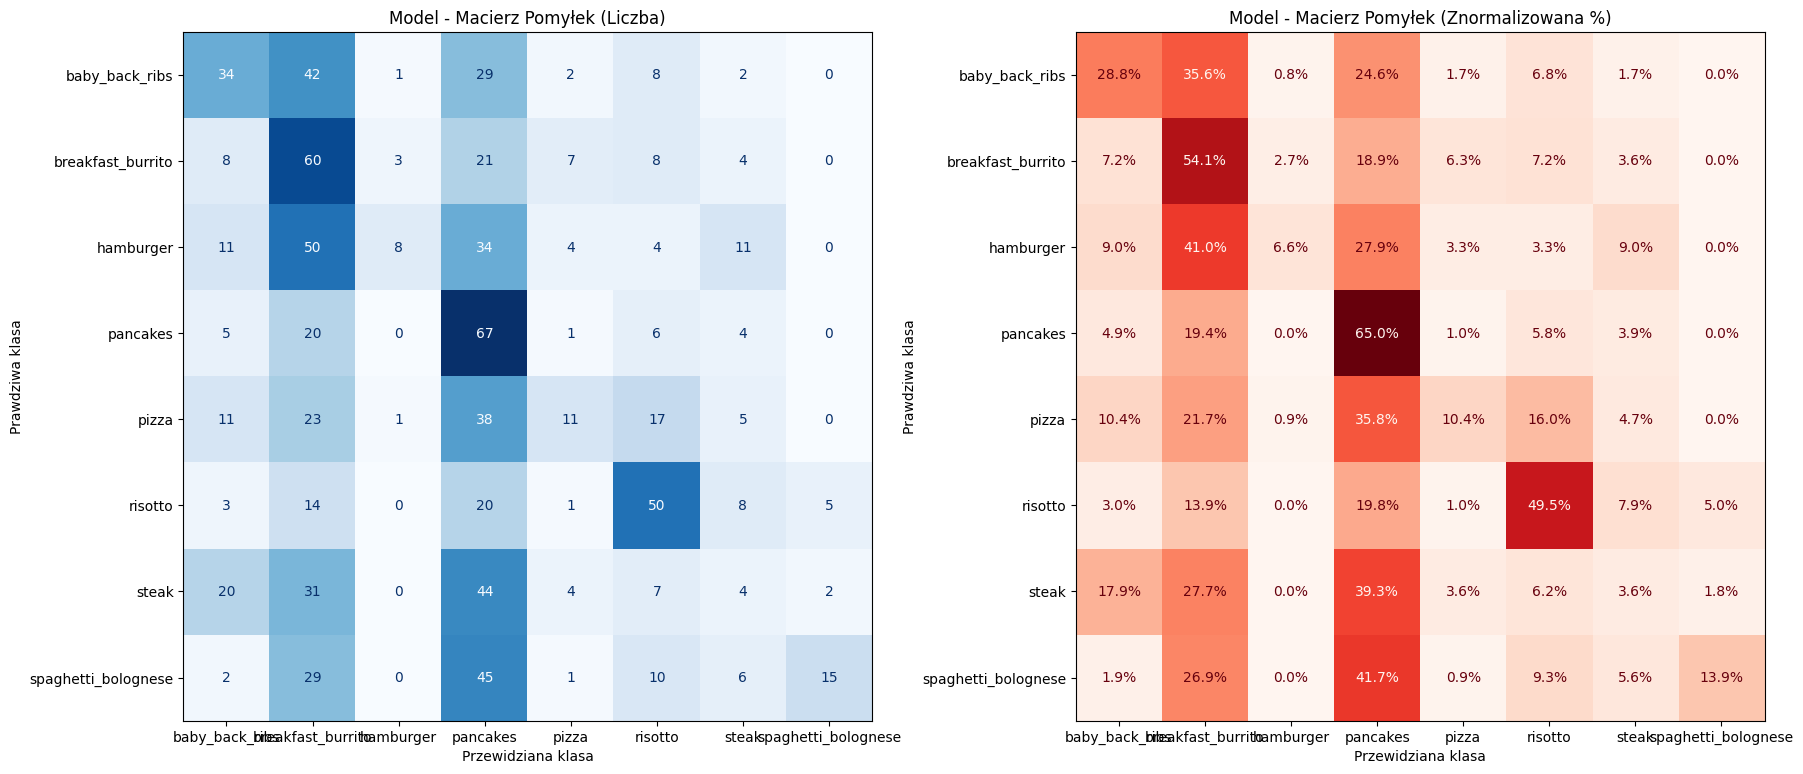

(                     precision    recall  f1-score  support
 baby_back_ribs        0.361702  0.288136  0.320755      118
 breakfast_burrito     0.223048  0.540541  0.315789      111
 hamburger             0.615385  0.065574  0.118519      122
 pancakes              0.224832  0.650485  0.334165      103
 pizza                 0.354839  0.103774  0.160584      106
 risotto               0.454545  0.495050  0.473934      101
 steak                 0.090909  0.035714  0.051282      112
 spaghetti_bolognese   0.681818  0.138889  0.230769      108
 accuracy              0.282633  0.282633  0.282633        0
 macro avg             0.375885  0.289770  0.250725      881
 weighted avg          0.377995  0.282633  0.246692      881,
 array([[34, 42,  1, 29,  2,  8,  2,  0],
        [ 8, 60,  3, 21,  7,  8,  4,  0],
        [11, 50,  8, 34,  4,  4, 11,  0],
        [ 5, 20,  0, 67,  1,  6,  4,  0],
        [11, 23,  1, 38, 11, 17,  5,  0],
        [ 3, 14,  0, 20,  1, 50,  8,  5],
        [20, 31

In [6]:
model_path = 'models/efficientnet_addidtional_layer_best.h5'
model = load_model(model_path)
evaluate_model_pro(model, test_ds, TARGET_CLASSES)